In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_killing = pd.read_csv('data/cleaned_killing_H30.csv')
df_soumu = pd.read_csv('data/cleaned_soumu_H30.csv')

print(df_killing.dtypes)
print(df_killing.iloc[range(0,4)].applymap(type))
print()
print(df_soumu.dtypes)
print(df_soumu.iloc[range(0,4)].applymap(type))

自治体名    object
引取数      int64
殺処分数     int64
dtype: object
            自治体名            引取数           殺処分数
0  <class 'str'>  <class 'int'>  <class 'int'>
1  <class 'str'>  <class 'int'>  <class 'int'>
2  <class 'str'>  <class 'int'>  <class 'int'>
3  <class 'str'>  <class 'int'>  <class 'int'>

pre            object
寄附件数            int64
寄附金額            int64
寄附件数_県外         int64
寄附金額_県外         int64
返礼品の調達に係る費用     int64
返礼品の送付に係る費用     int64
広報に係る費用         int64
決済等に係る費用        int64
事務に係る費用         int64
その他費用           int64
広報活動            int64
呼びかけ            int64
見直し             int64
イベントPR          int64
決済              int64
用途選択            int64
分野を選択           int64
具体的な事業を選択       int64
クラウドファンディング     int64
まちづくり・市民活動      int64
スポーツ・文化振興       int64
健康・医療・福祉        int64
環境・衛生           int64
教育・人づくり         int64
子ども・子育て         int64
地域・産業振興         int64
観光・交流・定住促進      int64
安心・安全・防災        int64
災害支援・復興         int64
dtype: object
             pre           寄附件数

In [23]:
#2つのデータを連結
df = pd.concat([df_soumu, df_killing], axis=1)
df2 = df.drop(['pre', '自治体名'], axis=1)

print(df2.columns)
print()
print(df2.isnull().sum())

Index(['寄附件数', '寄附金額', '寄附件数_県外', '寄附金額_県外', '返礼品の調達に係る費用', '返礼品の送付に係る費用',
       '広報に係る費用', '決済等に係る費用', '事務に係る費用', 'その他費用', '広報活動', '呼びかけ', '見直し',
       'イベントPR', '決済', '用途選択', '分野を選択', '具体的な事業を選択', 'クラウドファンディング',
       'まちづくり・市民活動', 'スポーツ・文化振興', '健康・医療・福祉', '環境・衛生', '教育・人づくり', '子ども・子育て',
       '地域・産業振興', '観光・交流・定住促進', '安心・安全・防災', '災害支援・復興', '引取数', '殺処分数'],
      dtype='object')

寄附件数           0
寄附金額           0
寄附件数_県外        0
寄附金額_県外        0
返礼品の調達に係る費用    0
返礼品の送付に係る費用    0
広報に係る費用        0
決済等に係る費用       0
事務に係る費用        0
その他費用          0
広報活動           0
呼びかけ           0
見直し            0
イベントPR         0
決済             0
用途選択           0
分野を選択          0
具体的な事業を選択      0
クラウドファンディング    0
まちづくり・市民活動     0
スポーツ・文化振興      0
健康・医療・福祉       0
環境・衛生          0
教育・人づくり        0
子ども・子育て        0
地域・産業振興        0
観光・交流・定住促進     0
安心・安全・防災       0
災害支援・復興        0
引取数            0
殺処分数           0
dtype: int64


In [24]:
#VIF統計量を出力
r = df2.corr()
VIF = 1 /(1- r**2)

print(VIF.iloc[-2] >5)
print()
print(VIF.iloc[-1] >5)

#同じ項目を除き全てがFalse -> 取引数・殺処分と他項目の間で多重共線性はみられない

寄附件数           False
寄附金額           False
寄附件数_県外        False
寄附金額_県外        False
返礼品の調達に係る費用    False
返礼品の送付に係る費用    False
広報に係る費用        False
決済等に係る費用       False
事務に係る費用        False
その他費用          False
広報活動           False
呼びかけ           False
見直し            False
イベントPR         False
決済             False
用途選択           False
分野を選択          False
具体的な事業を選択      False
クラウドファンディング    False
まちづくり・市民活動     False
スポーツ・文化振興      False
健康・医療・福祉       False
環境・衛生          False
教育・人づくり        False
子ども・子育て        False
地域・産業振興        False
観光・交流・定住促進     False
安心・安全・防災       False
災害支援・復興        False
引取数             True
殺処分数           False
Name: 引取数, dtype: bool

寄附件数           False
寄附金額           False
寄附件数_県外        False
寄附金額_県外        False
返礼品の調達に係る費用    False
返礼品の送付に係る費用    False
広報に係る費用        False
決済等に係る費用       False
事務に係る費用        False
その他費用          False
広報活動           False
呼びかけ           False
見直し            False
イベントPR         False
決済             False
用途選択      

In [58]:
#線形モデルの構築
from sklearn.linear_model import LinearRegression

x1 = pd.DataFrame(df2['引取数'])
x2 = pd.DataFrame(df2['殺処分数'])
y = pd.DataFrame(df2['寄附金額'])

model1 = LinearRegression().fit(x1, y)
model2 = LinearRegression().fit(x2, y)

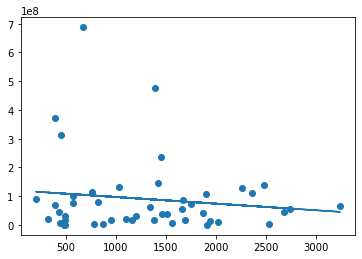

In [59]:
#引取数の線形回帰
plt.scatter(df2['引取数'], df2['寄附金額'])
plt.plot(x1, model1.predict(x1))

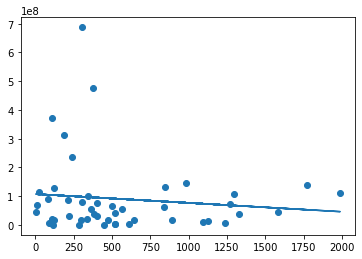

In [60]:
#殺処分数の線形回帰
plt.scatter(df2['殺処分数'], df2['寄附金額'])
plt.plot(x2, model2.predict(x2))

In [65]:
from sklearn.metrics import r2_score
R2_1 = model1.predict(x1)
R2_2 = model2.predict(x2)

print("決定係数_引取数: "+str(r2_score(y, R2_1)))
print("決定係数_殺処分数: "+str(r2_score(y, R2_2)))

決定係数_引取数: 0.01784759055971652
決定係数_殺処分数: 0.013172979309087118
